# Model Preselect test logeristic regression


In [1]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import PolynomialFeatures

%run -i miniutil_singel_pipe_eval_helper.py

df_summery = pd.DataFrame()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load detection_pipe


# Feature list

* PSD_raw
* PSD_den
* PSD_bssm
* PSD_denbssm
* ICA_demix
* MEL_raw
* MEL_den
* MEL_bssm
* MEL_denbssm


# Low noise ID00

In [2]:
## Meta
machines = ['pump']
SNRs = ['6dB']
IDs = ['00']
feat_discfile = '/dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl' 

## feat: PSD_raw

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.8683554208029732
pipe saved to pickle


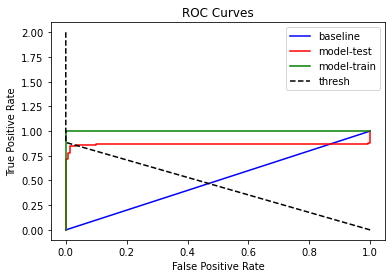

logregp2_pump006dBPSD_raw


In [3]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5})
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'p2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## ICA demix

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.5662104625729588
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.5460902733630006
pipe saved to pickle


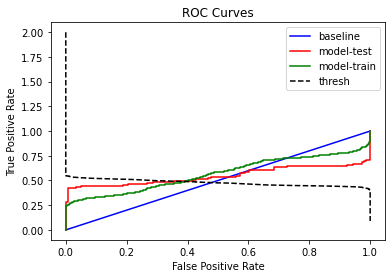

logregp2_pump006dBICA_demix


In [4]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'ICA_demix'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5})
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'p2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## feat: MEL raw

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9287495721062156
pipe saved to pickle


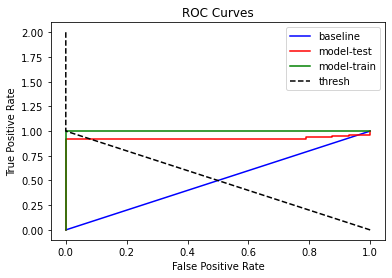

logregpcap2_pump006dBMEL_raw


In [5]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

In [6]:
df_summery['logregpcap2_pump006dBMEL_raw']

base  recall          1.000000
test  recall          0.909091
train recall          1.000000
base  precision       0.500000
test  precision       1.000000
train precision       1.000000
base  ROC-AUC         0.500000
test  ROC-AUC         0.928750
train ROC-AUC         1.000000
base  accuracy        0.500000
test  accuracy        0.954545
train accuracy        1.000000
TN - act. norm      143.000000
TP - act. abnr      130.000000
FP - false alarm      0.000000
FN - missed          13.000000
Name: logregpcap2_pump006dBMEL_raw, dtype: float64

## MEL denoised 

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9491906694703898
pipe saved to pickle


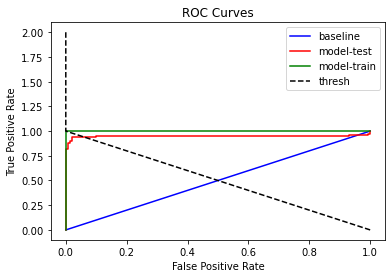

logregpcap2_pump006dBMEL_den


In [7]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_den'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9349112426035504
pipe saved to pickle


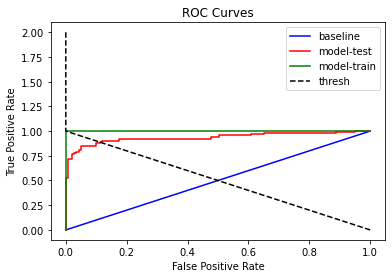

logregpcap2_pump006dBMEL_denbssm


In [8]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_denbssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# High Noise ID000

In [9]:
## Meta
machines = ['pump']
SNRs = ['min6dB']
IDs = ['00']
feat_discfile = '/dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl' 

## feat: MEL denoised flat

../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.7002787422367842
pipe saved to pickle


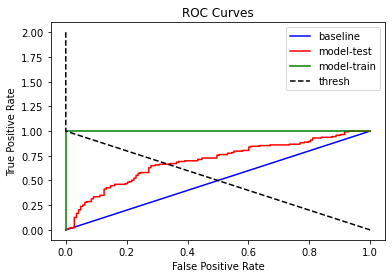

logregpcap2_pump00min6dBMEL_denbssm


In [10]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_denbssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6387109394102402
pipe saved to pickle


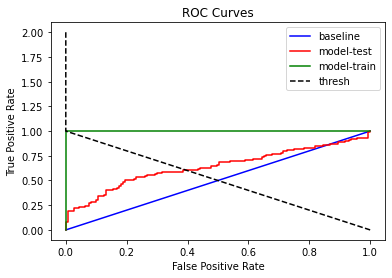

logregpcap2_pump00min6dBMEL_den


In [11]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_den'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## feat: PSD_raw, PSD_den, PSD_bssm, PSD_denbssm

../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6129884101912074
pipe saved to pickle


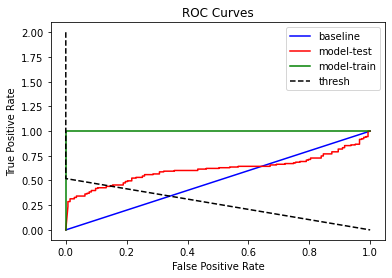

logregpcap2_pump00min6dBPSD_raw
../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.4406572448530491
pipe saved to pickle


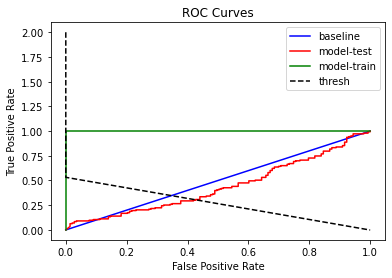

logregpcap2_pump00min6dBPSD_den
../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6347987676659006
pipe saved to pickle


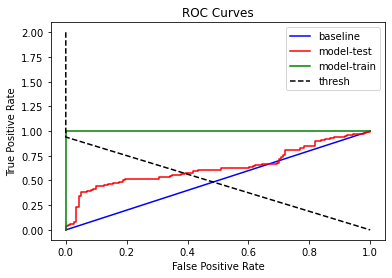

logregpcap2_pump00min6dBPSD_bssm
../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6821604968458116
pipe saved to pickle


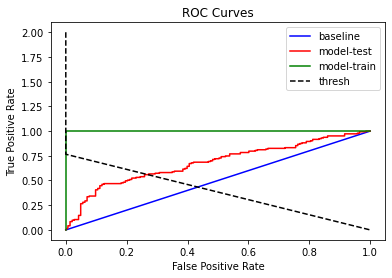

logregpcap2_pump00min6dBPSD_denbssm


In [12]:
def doit(feat_name, df_summery):
    df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ feat_name],
                        feat = {'function':'flat'})

    preprocessing = [
    (StandardScaler, {}),
    #(PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
    ]

    modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
    pipe = Pipe(preprocessing, modeling, True)
    pipe.run_pipe(tasks[0])

    name_of_test = pipe.model.name + 'pcap2' +'_' + npart

    pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
    print(name_of_test)

for f in ['PSD_raw', 'PSD_den', 'PSD_bssm', 'PSD_denbssm']:
    doit(f,df_summery)

## summery for ID00

In [13]:
#df_summery.to_pickle('S01_summerys/S01_LogReg_Pump_ID00')


In [14]:
df_summery[[c for c in df_summery.columns if 'min6dB' in c]].loc['test  ROC-AUC']

logregpcap2_pump00min6dBMEL_denbssm    0.700279
logregpcap2_pump00min6dBMEL_den        0.638711
logregpcap2_pump00min6dBPSD_raw        0.612988
logregpcap2_pump00min6dBPSD_den        0.440657
logregpcap2_pump00min6dBPSD_bssm       0.634799
logregpcap2_pump00min6dBPSD_denbssm    0.682160
Name: test  ROC-AUC, dtype: float64

# High Noise ID02

In [15]:
## Meta
machines = ['pump']
SNRs = ['min6dB']
IDs = ['02']
feat_discfile = '/dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl' 

## feat MEL_denbssm

../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.49914779644509377
pipe saved to pickle


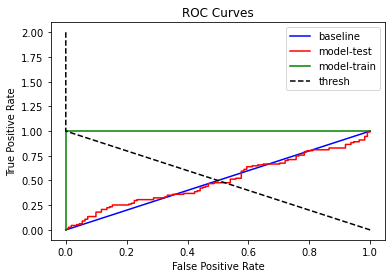

logregpcap2_pump02min6dBMEL_denbssm


In [16]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_denbssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcap2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

In [17]:
df_summery[[c for c in df_summery.columns if 'min6dB' in c]].loc['test  ROC-AUC']

logregpcap2_pump00min6dBMEL_denbssm    0.700279
logregpcap2_pump00min6dBMEL_den        0.638711
logregpcap2_pump00min6dBPSD_raw        0.612988
logregpcap2_pump00min6dBPSD_den        0.440657
logregpcap2_pump00min6dBPSD_bssm       0.634799
logregpcap2_pump00min6dBPSD_denbssm    0.682160
logregpcap2_pump02min6dBMEL_denbssm    0.499148
Name: test  ROC-AUC, dtype: float64

## feat: PSD_raw, PSD_den, PSD_bssm, PSD_denbssm

../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.39907475042610174
pipe saved to pickle


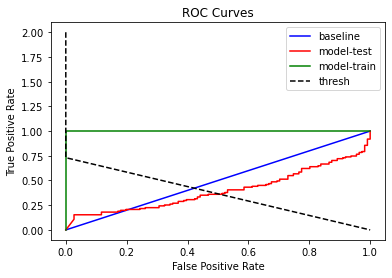

logregp2_pump02min6dBPSD_raw
../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9999862368561977
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.5133511890268646
pipe saved to pickle


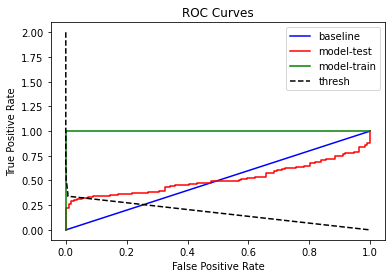

logregp2_pump02min6dBPSD_den
../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6033601168736303
pipe saved to pickle


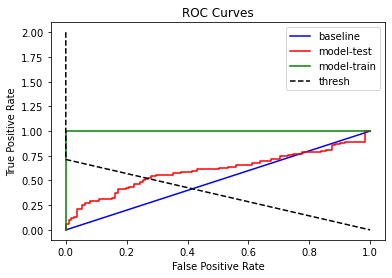

logregp2_pump02min6dBPSD_bssm
../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.631685739793848
pipe saved to pickle


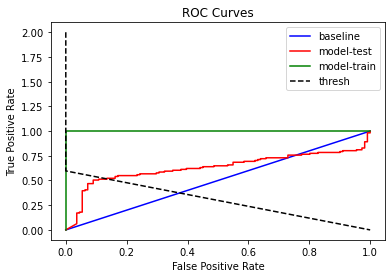

logregp2_pump02min6dBPSD_denbssm


In [18]:
def doit(feat_name, df_summery):
    df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ feat_name],
                        feat = {'function':'flat'})

    preprocessing = [
    (StandardScaler, {}),
    #(PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
    ]

    modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
    pipe = Pipe(preprocessing, modeling, True)
    pipe.run_pipe(tasks[0])

    name_of_test = pipe.model.name + 'p2' +'_' + npart

    pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
    print(name_of_test)

for f in ['PSD_raw', 'PSD_den', 'PSD_bssm', 'PSD_denbssm']:
    doit(f,df_summery)

## MEL framed 

../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.37041435078415413
pipe saved to pickle


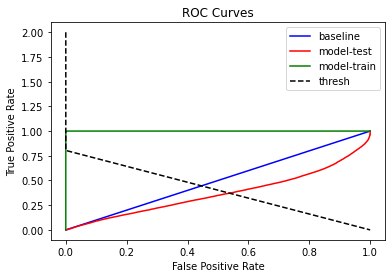

logregpcafrp2_pump02min6dBMEL_den


In [19]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_den'],
                        feat = {'function':'frame', 'frames': 5})

preprocessing = [
    (StandardScaler, {}),
    (PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
    ]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pcafrp2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

In [20]:
df_summery[[c for c in df_summery.columns if 'min6dB' in c]].loc['test  ROC-AUC']

logregpcap2_pump00min6dBMEL_denbssm    0.700279
logregpcap2_pump00min6dBMEL_den        0.638711
logregpcap2_pump00min6dBPSD_raw        0.612988
logregpcap2_pump00min6dBPSD_den        0.440657
logregpcap2_pump00min6dBPSD_bssm       0.634799
logregpcap2_pump00min6dBPSD_denbssm    0.682160
logregpcap2_pump02min6dBMEL_denbssm    0.499148
logregp2_pump02min6dBPSD_raw           0.399075
logregp2_pump02min6dBPSD_den           0.513351
logregp2_pump02min6dBPSD_bssm          0.603360
logregp2_pump02min6dBPSD_denbssm       0.631686
logregpcafrp2_pump02min6dBMEL_den      0.370414
Name: test  ROC-AUC, dtype: float64

# Summery

In [21]:
df_summery[[c for c in df_summery.columns if 'min6dB' in c]].loc['test  ROC-AUC']

logregpcap2_pump00min6dBMEL_denbssm    0.700279
logregpcap2_pump00min6dBMEL_den        0.638711
logregpcap2_pump00min6dBPSD_raw        0.612988
logregpcap2_pump00min6dBPSD_den        0.440657
logregpcap2_pump00min6dBPSD_bssm       0.634799
logregpcap2_pump00min6dBPSD_denbssm    0.682160
logregpcap2_pump02min6dBMEL_denbssm    0.499148
logregp2_pump02min6dBPSD_raw           0.399075
logregp2_pump02min6dBPSD_den           0.513351
logregp2_pump02min6dBPSD_bssm          0.603360
logregp2_pump02min6dBPSD_denbssm       0.631686
logregpcafrp2_pump02min6dBMEL_den      0.370414
Name: test  ROC-AUC, dtype: float64

 the bssm PSD seems most robust between ID00 and ID02 and is better then the base linse

# Low Noise ID02 - with best model from high noise
hence the base line seems to struggle more with lower noise for this pump

In [22]:
## Meta
machines = ['pump']
SNRs = ['6dB']
IDs = ['02']
feat_discfile = '/dataset/extdia_v1/pump6dB02_EDiaV1HPaug0_pandaDisc.pkl' 

## PSD_bssm

../..//dataset/extdia_v1/pump6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6861456050645239
pipe saved to pickle


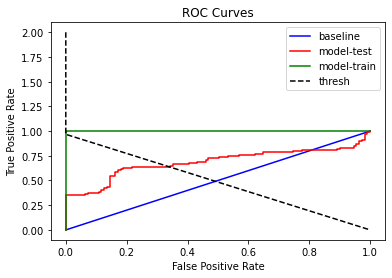

logregp2_pump026dBPSD_bssm


In [23]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_bssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PCA, {'n_components':64}),
    (PolynomialFeatures, {'degree': 2})
    ]

modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 300 })
pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'p2' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

In [24]:
df_summery.to_pickle('S01_summerys/S01_LogReg_Pump')